Sheng Xu 

In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
## Toy problem 
    #
    # Logistic regression should be able to perfectly predict all 10 examples
    # five examples have x values within (-2, -1) and are labeled 0
    # five examples have x values within (+1, +2) and are labeled 1
    N = 10
    x_NF = np.hstack([np.linspace(-2, -1, 5), np.linspace(1,2, 5)])[:,np.newaxis]
    y_N = np.hstack([np.zeros(5), 1.0 * np.ones(5)])

    lr = LRGD(
        alpha=0.1, step_size=0.1, init_w_recipe='zeros')

    # Prepare features by inserting column of all 1
    xbias_NG = lr.insert_final_col_of_all_ones(x_NF)

## 1a

In [3]:
    loss=[]; grad=[];
    arr=np.linspace(-2, 12, 141)
    for i in arr:
        w=np.array([i,0])
        loss.append(lr.calc_loss(w, xbias_NG, y_N))
        grad.append(lr.calc_grad(w, xbias_NG, y_N)[0])
    #print (loss, grad)
    id_min_cost=np.argmin(loss)

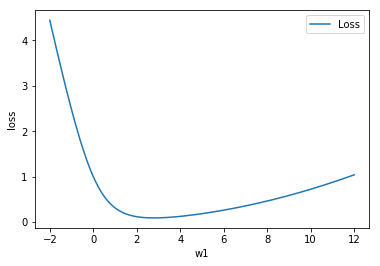

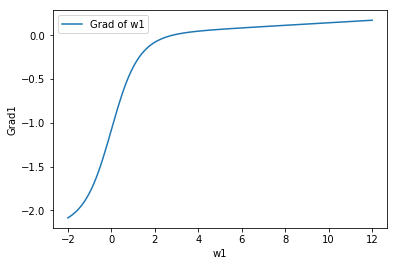

In [4]:
plt.plot(arr, loss, label='Loss')
plt.xlabel('w1');
plt.ylabel('loss');
plt.legend();
plt.show();

plt.plot(arr, grad, label='Grad of w1')
plt.xlabel('w1');
plt.ylabel('Grad1');
plt.legend();
plt.show();

Yes.  
For loss:  
We know that when w1 is less than 0, the loss is big because the value of log_loss is big, because $w*x$ is negative, which leads to wrong classification.  
On the other hand, when w1 is positive, the loss is bigger because the l2_penalty goes bigger as w1 is bigger.  
  
For Gradient:   
From the information of loss, we know: the partial derivative of w1 is negative when $w1<0$, it will reach 0 somewhere positive. Then, it goes positive when w1 grows bigger.

The minimum is somewhere between 2 and 3, close to 3.   
Here, my estimation is 2.8. (See below)

In [5]:
print("best w1 for LR with 1 feature and 0 bias: %.3f" % arr[id_min_cost]) 

best w1 for LR with 1 feature and 0 bias: 2.800


In [6]:
lr.fit(x_NF, y_N)

Initializing w_G with 2 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.541011  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.888015  avg_L1_norm_grad         0.494016  w[0]    0.108 bias    0.000
iter    2/10000  loss         0.794586  avg_L1_norm_grad         0.451748  w[0]    0.207 bias    0.000
iter    3/10000  loss         0.716373  avg_L1_norm_grad         0.414112  w[0]    0.297 bias    0.000
iter    4/10000  loss         0.650555  avg_L1_norm_grad         0.380787  w[0]    0.380 bias    0.000
iter    5/10000  loss         0.594813  avg_L1_norm_grad         0.351344  w[0]    0.456 bias    0.000
iter    6/10000  loss         0.547278  avg_L1_norm_grad         0.325330  w[0]    0.527 bias    0.000
iter    7/10000  loss         0.506451  avg_L1_norm_grad         0.302308  w[0]    0.592 bias    0.000
iter    8/10000  loss         0.471140  avg_L1_norm_grad  

iter  920/10000  loss         0.089663  avg_L1_norm_grad         0.000076  w[0]    2.781 bias    0.000
iter  921/10000  loss         0.089663  avg_L1_norm_grad         0.000076  w[0]    2.781 bias    0.000
iter  940/10000  loss         0.089663  avg_L1_norm_grad         0.000067  w[0]    2.782 bias    0.000
iter  941/10000  loss         0.089663  avg_L1_norm_grad         0.000067  w[0]    2.782 bias    0.000
iter  960/10000  loss         0.089663  avg_L1_norm_grad         0.000059  w[0]    2.782 bias    0.000
iter  961/10000  loss         0.089663  avg_L1_norm_grad         0.000059  w[0]    2.782 bias    0.000
iter  980/10000  loss         0.089663  avg_L1_norm_grad         0.000052  w[0]    2.782 bias    0.000
iter  981/10000  loss         0.089663  avg_L1_norm_grad         0.000052  w[0]    2.782 bias    0.000
iter 1000/10000  loss         0.089663  avg_L1_norm_grad         0.000046  w[0]    2.782 bias    0.000
iter 1001/10000  loss         0.089663  avg_L1_norm_grad         0.000045

## 1b

In [7]:
print(" Result for LR with 1 feature and 0 bias: ", lr.trace_w[-1])

 Result for LR with 1 feature and 0 bias:  [2.78265835e+00 1.02172570e-17]


In [8]:
matrix=np.matrix(lr.trace_w).T
w1=np.asarray(matrix[0])[-1]
w2=np.asarray(matrix[1])[-1]
idx=np.linspace(0, w1.size-1,w1.size)

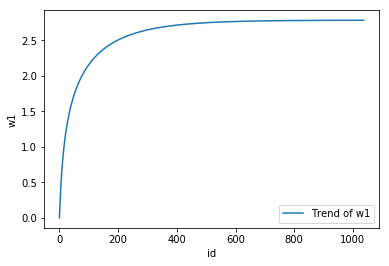

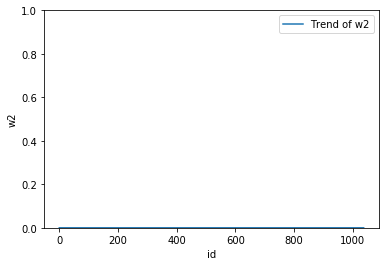

In [9]:
## Draw Picture
plt.plot(idx, w1, label='Trend of w1')
plt.xlabel('id');
plt.ylabel('w1');
plt.legend();
plt.show();

plt.plot(idx, w2, label='Trend of w2')
plt.xlabel('id');
plt.ylabel('w2');
plt.ylim([0.0, 1.0]);
plt.legend();
plt.show();

Yes.  
w1 approaches 2.78. The converging speed is fast at first, then becomes really slow before w1 reaches the final result.   
w2 stays at nearly 0 because it should be 0 from the symetricity of the question.

## 1c

In [10]:
lr2 = LRGD(
        alpha=0.1, step_size=0.1, init_w_recipe='uniform_-1_to_1')
lr2.fit(x_NF, y_N)

Initializing w_G with 2 features using recipe: uniform_-1_to_1
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         0.932814  avg_L1_norm_grad         0.579579  w[0]    0.098 bias    0.430
iter    1/10000  loss         0.834339  avg_L1_norm_grad         0.534178  w[0]    0.198 bias    0.415
iter    2/10000  loss         0.751280  avg_L1_norm_grad         0.492499  w[0]    0.290 bias    0.400
iter    3/10000  loss         0.681012  avg_L1_norm_grad         0.454653  w[0]    0.374 bias    0.385
iter    4/10000  loss         0.621302  avg_L1_norm_grad         0.420533  w[0]    0.452 bias    0.372
iter    5/10000  loss         0.570293  avg_L1_norm_grad         0.389904  w[0]    0.523 bias    0.360
iter    6/10000  loss         0.526460  avg_L1_norm_grad         0.362461  w[0]    0.590 bias    0.348
iter    7/10000  loss         0.488565  avg_L1_norm_grad         0.337881  w[0]    0.651 bias    0.337
iter    8/10000  loss         0.455603  avg_L1_n

iter  601/10000  loss         0.089675  avg_L1_norm_grad         0.000750  w[0]    2.766 bias    0.007
iter  620/10000  loss         0.089672  avg_L1_norm_grad         0.000668  w[0]    2.768 bias    0.006
iter  621/10000  loss         0.089672  avg_L1_norm_grad         0.000663  w[0]    2.768 bias    0.006
iter  640/10000  loss         0.089670  avg_L1_norm_grad         0.000590  w[0]    2.770 bias    0.006
iter  641/10000  loss         0.089670  avg_L1_norm_grad         0.000587  w[0]    2.770 bias    0.006
iter  660/10000  loss         0.089669  avg_L1_norm_grad         0.000523  w[0]    2.771 bias    0.005
iter  661/10000  loss         0.089669  avg_L1_norm_grad         0.000519  w[0]    2.771 bias    0.005
iter  680/10000  loss         0.089667  avg_L1_norm_grad         0.000463  w[0]    2.773 bias    0.005
iter  681/10000  loss         0.089667  avg_L1_norm_grad         0.000460  w[0]    2.773 bias    0.005
iter  700/10000  loss         0.089666  avg_L1_norm_grad         0.000410

In [11]:
print(" Result for LR with 1 feature and 0 bias: ", lr2.trace_w[-1])

 Result for LR with 1 feature and 0 bias:  [2.78266077e+00 9.11289218e-04]


In [12]:
matrix=np.matrix(lr2.trace_w).T
w1=np.asarray(matrix[0])[-1]
w2=np.asarray(matrix[1])[-1]
idx=np.linspace(0, w1.size-1,w1.size)

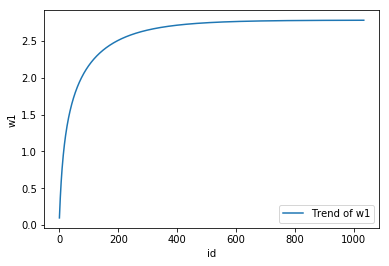

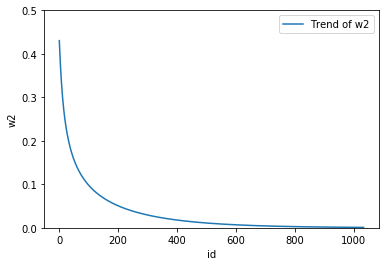

In [13]:
## Draw Picture
plt.plot(idx, w1, label='Trend of w1')
plt.xlabel('id');
plt.ylabel('w1');
plt.legend();
plt.show();

plt.plot(idx, w2, label='Trend of w2')
plt.xlabel('id');
plt.ylabel('w2');
plt.ylim([0.0, 0.5]);
plt.legend();
plt.show();

Yes.  
w1 approaches 2.78. The converging speed is fast at first, then becomes really slow before w1 is stablized.   
w2 approaches 0. The converging speed is fast at first, then becomes really slow before w2 is stabalized. 